<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
T-tests with two samples
              
</p>
</div>

Data Science Cohort Live NYC Aug 2024
<p>Phase 2</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

Similar to what we did for comparing one sample to a population mean:

- Assuming populations are normal.
- Are two samples drawn from same or different populations?

Compare **two** finite size samples by their means.

#### Two sample t-test

Test this with t-test:


Sample 1 (from population 1):

- Size $N_1$
- Sample mean $\bar{X}_1$ 

Sample 2 (from population 2):

- Size $N_2$
- Sample mean $\bar{X}_2$ 

Compare differences in means:

 $$ t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\left( \frac{s_1^2}{N_1} + \frac{s_2^2}{N_2} \right)}}$$

is t-distributed with degrees of freedom:

$$ df \approx \frac{\Big(\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2} \Big)^2 }{\frac{s_1^4}{N_1^2(N_1 - 1)} + \frac{s_2^4}{N_2^2(N_2 - 1)}} $$

No difference between populations (null):
- $t$ is centered around 0 under the null.


 where:
 - $s_1$ is sample 1 standard deviation
 - $s_2$ is sample 2 standard deviation
 - $N_1$ is sample 1 size.
 - $N_2$ is sample 2 size.

Hypothesis test:
    
Test whether t for our two samples:
 - Could have been generated by null or not.

In [1]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Scenario

Let's finally go back to our chinstrap penguin example:
- Is the average flipper length of males greater than for females?

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
pg_df = sns.load_dataset('penguins').dropna()
pg_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Let's subset on the chinstrap population and look at flipper length by sex:

In [3]:
chinstrap_df = pg_df[pg_df['species'] == 'Chinstrap'].loc[
    :,['flipper_length_mm', 'sex']]
print(chinstrap_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 152 to 219
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flipper_length_mm  68 non-null     float64
 1   sex                68 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [4]:
chinstrap_df.head()

,flipper_length_mm,sex
152,192.0,Female
153,196.0,Male
154,193.0,Male
155,188.0,Female
156,197.0,Male


Can groupby sex: aggregate and compare sample means:

In [5]:
chinstrap_means = \
chinstrap_df.groupby('sex').mean()

chinstrap_means

,flipper_length_mm
sex,
Female,191.735294
Male,199.911765


Calculate the sample spread.

In [6]:
chinstrap_stds = \
chinstrap_df.groupby('sex').std()

chinstrap_stds

,flipper_length_mm
sex,
Female,5.754096
Male,5.976558


Remember:
- wasn't clear whether the difference in means was a meaningful difference
- or just a statistical fluctuation

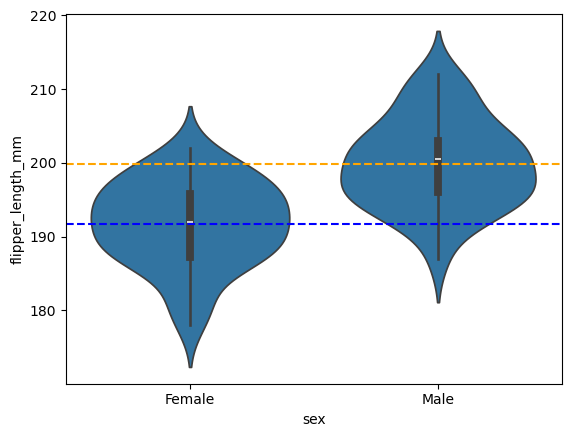

In [7]:
fig, ax = plt.subplots()
sns.violinplot(x = 'sex', y = 'flipper_length_mm', 
               data = chinstrap_df, ax = ax)
ax.axhline(y =chinstrap_means.loc['Female'].values,
          c = 'blue', linestyle = '--')
ax.axhline(y =chinstrap_means.loc['Male'].values,
          c = 'orange', linestyle = '--')
plt.show()

**Conduct statistical test on flipper length means**

- $H_0$: The difference in the average flipper lengths of male and female chinstraps is not statistically significantly different from zero.

- $H_A$: The difference in the average flipper lengths of male and female chinstraps is greater than zero.

    


**A right tailed test**

In [8]:
Nbysex = chinstrap_df.groupby('sex').count()
Nbysex

,flipper_length_mm
sex,
Female,34
Male,34


Sample sizes:
- sufficiently small
- would be wise to use a t-test

**Assuming null is normally distributed**

Can do t-test from scratch by:
- Calculating degrees of freedom with formula.
- Calculating t-statistic and critical values.
- Calculating p-values with cdfs, etc.

A little tedious.

#### Or can just use scipy:
- Has a nice module taking care of all details for us:
- ttest_ind: conduct t-test for two independent samples
    - takes in samples directly and type of tailed test

In [9]:
from scipy.stats import ttest_ind # this is the two sample t-test function

fem_chinstraps = chinstrap_df[chinstrap_df['sex'] == 'Female']['flipper_length_mm']
male_chinstraps = chinstrap_df[chinstrap_df['sex'] == 'Male']['flipper_length_mm']


tttest_ind(sample1, sample2, equal_var = False, alternative = ... )

- equal_var = False:
    - does not assume variance of populations are same
    - generalizes to unequal sample sizes

In [10]:
ttest_ind(male_chinstraps, fem_chinstraps, equal_var = False, alternative = 'greater')

TtestResult(statistic=5.746719446696214, pvalue=1.2675740393460547e-07, df=65.90525961646294)

**We can reject the null**:
- Unlikely average male flipper length in our sample greater than female by chance:
    - under null of there being no difference.


**Caveat**

If using older version of scipy *alternative = ___* doesnt exist:
- outputs p-value for two tailed test
- one tailed test is half of that

In [17]:
# older Scipy versions only do two tailed two-sample t-tests
ttest_ind(male_chinstraps, fem_chinstraps, equal_var = False)

TtestResult(statistic=5.746719446696214, pvalue=2.5351480786921094e-07, df=65.90525961646294)

Can also do a two sample t-test if given:
- means of the two samples
- stds of the two samples
- sample sizes

**Situation is rarer than just having the samples, but does happen**

In [18]:
from scipy.stats import ttest_ind_from_stats

ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=, alternative=)


In [19]:
male_mean = chinstrap_means.loc['Male'].values
female_mean = chinstrap_means.loc['Female'].values
male_std = chinstrap_stds.loc['Male'].values
female_std = chinstrap_stds.loc['Female'].values
N_male = Nbysex.loc['Male'].values
N_female= Nbysex.loc['Female'].values

In [20]:
ttest_ind_from_stats(male_mean, male_std, N_male, female_mean, female_std, N_female, equal_var=False, alternative='greater')

Ttest_indResult(statistic=array([5.74671945]), pvalue=array([1.26757404e-07]))

Flipper length could be a good variable to use for helping to differentiating between male and female Chinstraps.

#### Getting some practice with two-sample t-tests

Want to test the difference of weights:
- Sample of savannah elephants from Kenya
- Sample of forest elephants from Gabon



Have small samples of weight for each.
- Statistical difference in population means?

In [27]:
# Kenyan sample
ken = np.array([8762, 8880, 8743, 8901,
        8252, 8966, 8369, 9001,
         8857, 8147, 8927, 9005,
         9083, 8477, 8760, 8915,
         8927, 8829, 8579, 9002, 
                8927, 8655, 9011])

print(ken.mean())
print(ken.std(ddof = 1))
print(len(ken))

8781.521739130434
256.09015982749963
23


In [28]:
# Gabonese sample
gab = np.array([
        8234, 8929, 7922, 8688, 8840, 
        8759, 8127, 8574, 8533, 8944, 
        8631, 8665, 8712, 8984, 8601, 
        8559, 8228, 8474, 8708, 8128
])

print(gab.mean())
print(gab.std(ddof = 1))
print(len(gab))

8562.0
296.1535874650534
20


Conduct t-test on the difference of means.
- alternative = 'two-sided' is default

In [29]:
# make your data science instructor proud! conduct a two sided two sample t-test and interpret the results

ttest_ind(ken,gab, equal_var = False)

TtestResult(statistic=2.580511910577727, pvalue=0.01386406197174058, df=37.901865420449745)

#### Right-tailed version
- We believe that the Kenyan elephants drawn from population with average mean larger than Gabonese elephants.

- $H_0$: The difference in the mean weight of Kenyan and Gabonese elephant populations are not statistically significantly different.

- $H_A$: The difference in the mean weight of Kenyan elephants greater than Gabonese elephant population.

    


In [31]:
# do it! remember: for a one-tailed test sample order matters in the t-test command.

ttest_ind(ken, gab, equal_var = False, alternative = 'greater') 

TtestResult(statistic=2.580511910577727, pvalue=0.00693203098587029, df=37.901865420449745)

Conclusion?